# MNIST Dataset-2: Impact of Standardization

In this note, we still model neural network for recognition of handwritten digits using **mnist** data, but fetch the datasets directly from Keras, rather than one from Yan LeCun's web. 

The raw data from Keras is not standardized, i.e. the numbers in each pixel can be 0-255 (The numbers in each pixel from Yan LeCun's web are 0-1). We found that in this case the learning rate of stochastic gradient descent is sensitive to the model accuracy. Sometimes using large rate ($\alpha =0.1$) will result in poor performance, so we have to be careful to select a smaller value of $\alpha$, such as $\alpha =0.01$ for numerical optimization.

However, with **considering standardization**, the learning parameters and network structure are **less** sensitive. Roughly speaking, the learning processes using standardized data are more efficient and accurate tha using the raw data. In the following, we will demonstrate the difference.

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

In [3]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

## 0. The MNIST database from Keras

In this version, we fetch the **mnist** data from Keras:

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Each MNIST image is represented by 28 pixels by 28 pixels:

Note the raw data format is a two-dimensional array of 28 pixels by 28 pixels. To input Keras, we need to reshape to a one-dimensional array of 784: 

In [5]:
X_train.shape, y_train.shape, type(X_train)

((60000, 28, 28), (60000,), numpy.ndarray)

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Reshape the MNIST data in 784-dimensional vector space with integers [0,255]:

In [7]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [8]:
X_train.shape, X_test.shape, type(X_train)

((60000, 784), (10000, 784), numpy.ndarray)

In [9]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [68]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### The images:

In [12]:
def plotExamples(data, labels):
    plt.figure(figsize=(8,5))
    for i in range(8):
        sub = 241 + i
        ax = plt.subplot(sub)
        index = np.random.randint(0, data.shape[0])
        ax.set_title("num: " + str(np.argmax(labels[index])))
        im = np.reshape(data[index], (28, 28))
        plt.imshow(im, cmap="gray")
    plt.show()

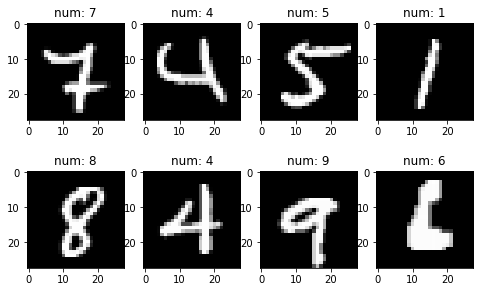

In [61]:
plotExamples(X_train, y_train)

## 1. Standardization

In [63]:
from sklearn import preprocessing

In [71]:
scalar = preprocessing.StandardScaler().fit(X_train)
X_train_2 = scalar.transform(X_train)
X_test_2 = scalar.transform(X_test)

/Users/hhhung/anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [70]:
X_train_2[0]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -4.41807799e-03,  -5.75481961e-03,  -4.08251693e-03,
        -4.08251693e-03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -4.08251693e-03,
        -4.70968827e-03,  -8.79934640e-03,  -1.15905591e-02,
        -1.47589798e-02,  -1.92848546e-02,  -2.46717975e-02,
        -2.90710271e-02,  -3.05926583e-02,  -3.11640127e-02,
        -3.19628719e-02,  -3.02025355e-02,  -3.13102175e-02,
        -2.83833960e-02,  -2.31191906e-02,  -1.91666260e-02,
        -1.67723008e-02,

### The images:

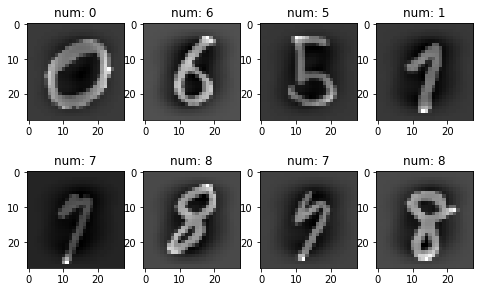

In [75]:
plotExamples(X_train_2, y_train)

## 2. Training Neural Networks

Here we just benchmark several neural network models and compare the model performance. All results show using standardized mnist data is more efficient than the raw data and here we will show how significant it improves.

### (a) 1-hidden layer with 100 neurons, sigmoid activation in all layers


#### Unstandardized data, mse loss, $\alpha$ = 0.1

In [85]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
sgd = SGD(lr=0.1)
model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, nb_epoch=50, verbose=2)
scores = model.evaluate(X_test, y_test);
print(' test set, loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/50
7s - loss: 0.0610 - acc: 0.6534
Epoch 2/50
6s - loss: 0.0287 - acc: 0.8775
Epoch 3/50
5s - loss: 0.0208 - acc: 0.9014
Epoch 4/50
5s - loss: 0.0177 - acc: 0.9102
Epoch 5/50
5s - loss: 0.0159 - acc: 0.9169
Epoch 6/50
5s - loss: 0.0148 - acc: 0.9218
Epoch 7/50
5s - loss: 0.0139 - acc: 0.9262
Epoch 8/50
6s - loss: 0.0131 - acc: 0.9294
Epoch 9/50
6s - loss: 0.0127 - acc: 0.9321
Epoch 10/50
6s - loss: 0.0122 - acc: 0.9340
Epoch 11/50
5s - loss: 0.0118 - acc: 0.9360
Epoch 12/50
5s - loss: 0.0115 - acc: 0.9380
Epoch 13/50
5s - loss: 0.0112 - acc: 0.9405
Epoch 14/50
5s - loss: 0.0109 - acc: 0.9415
Epoch 15/50
5s - loss: 0.0106 - acc: 0.9426
Epoch 16/50
5s - loss: 0.0104 - acc: 0.9442
Epoch 17/50
5s - loss: 0.0102 - acc: 0.9449
Epoch 18/50
5s - loss: 0.0100 - acc: 0.9460
Epoch 19/50
5s - loss: 0.0098 - acc: 0.9468
Epoch 20/50
5s - loss: 0.0096 - acc: 0.9486
Epoch 21/50
5s - loss: 0.0095 - acc: 0.9487
Epoch 22/50
5s - loss: 0.0093 - acc: 0.9504
Epoch 23/50
5s - loss: 0.0090 - acc: 0.95

#### Standardized data, mse loss, $\alpha =0.1$

In [86]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
sgd = SGD(lr=0.1)
model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train_2, y_train, batch_size=32, nb_epoch=50, verbose=2)
scores = model.evaluate(X_test_2, y_test);
print('test, loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/50
8s - loss: 0.0864 - acc: 0.3466
Epoch 2/50
6s - loss: 0.0625 - acc: 0.6185
Epoch 3/50
6s - loss: 0.0437 - acc: 0.7974
Epoch 4/50
6s - loss: 0.0334 - acc: 0.8555
Epoch 5/50
5s - loss: 0.0276 - acc: 0.8774
Epoch 6/50
5s - loss: 0.0240 - acc: 0.8871
Epoch 7/50
5s - loss: 0.0217 - acc: 0.8940
Epoch 8/50
6s - loss: 0.0202 - acc: 0.8991
Epoch 9/50
5s - loss: 0.0190 - acc: 0.9031
Epoch 10/50
5s - loss: 0.0180 - acc: 0.9059
Epoch 11/50
5s - loss: 0.0173 - acc: 0.9083
Epoch 12/50
5s - loss: 0.0167 - acc: 0.9107
Epoch 13/50
5s - loss: 0.0161 - acc: 0.9126
Epoch 14/50
5s - loss: 0.0157 - acc: 0.9141
Epoch 15/50
5s - loss: 0.0153 - acc: 0.9160
Epoch 16/50
5s - loss: 0.0149 - acc: 0.9176
Epoch 17/50
5s - loss: 0.0146 - acc: 0.9192
Epoch 18/50
5s - loss: 0.0143 - acc: 0.9206
Epoch 19/50
5s - loss: 0.0140 - acc: 0.9218
Epoch 20/50
5s - loss: 0.0138 - acc: 0.9228
Epoch 21/50
5s - loss: 0.0135 - acc: 0.9237
Epoch 22/50
5s - loss: 0.0133 - acc: 0.9250
Epoch 23/50
5s - loss: 0.0131 - acc: 0.92

#### Unstandardized data, categorical_crosssentropy loss, $\alpha =0.1$

In [82]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, nb_epoch=50, verbose=2)
scores = model.evaluate(X_test, y_test);
print(' test set, loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/50
7s - loss: 0.8316 - acc: 0.7685
Epoch 2/50
6s - loss: 0.7087 - acc: 0.7824
Epoch 3/50
5s - loss: 0.6537 - acc: 0.7943
Epoch 4/50
5s - loss: 0.6335 - acc: 0.8022
Epoch 5/50
5s - loss: 0.6247 - acc: 0.8012
Epoch 6/50
5s - loss: 0.6187 - acc: 0.8025
Epoch 7/50
6s - loss: 0.6254 - acc: 0.7959
Epoch 8/50
5s - loss: 0.6175 - acc: 0.8020
Epoch 9/50
6s - loss: 0.6035 - acc: 0.8092
Epoch 10/50
5s - loss: 0.5834 - acc: 0.8165
Epoch 11/50
5s - loss: 0.5682 - acc: 0.8225
Epoch 12/50
5s - loss: 0.5528 - acc: 0.8247
Epoch 13/50
6s - loss: 0.5644 - acc: 0.8214
Epoch 14/50
6s - loss: 0.6135 - acc: 0.8008
Epoch 15/50
5s - loss: 0.5659 - acc: 0.8229
Epoch 16/50
5s - loss: 0.5999 - acc: 0.8048
Epoch 17/50
5s - loss: 0.5908 - acc: 0.8112
Epoch 18/50
5s - loss: 0.5643 - acc: 0.8212
Epoch 19/50
6s - loss: 0.5466 - acc: 0.8272
Epoch 20/50
5s - loss: 0.5616 - acc: 0.8230
Epoch 21/50
6s - loss: 0.5720 - acc: 0.8176
Epoch 22/50
5s - loss: 0.5442 - acc: 0.8254
Epoch 23/50
6s - loss: 0.5660 - acc: 0.81

#### Unstandardized data, 'categorical_crosssentrop' loss, $\alpha =0.01$

In [84]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
sgd = SGD(lr=0.01) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, nb_epoch=50, verbose=2)
scores = model.evaluate(X_test, y_test);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/50
6s - loss: 1.0430 - acc: 0.8081
Epoch 2/50
5s - loss: 0.3991 - acc: 0.9028
Epoch 3/50
5s - loss: 0.3357 - acc: 0.9118
Epoch 4/50
5s - loss: 0.2961 - acc: 0.9203
Epoch 5/50
5s - loss: 0.2785 - acc: 0.9243
Epoch 6/50
5s - loss: 0.2652 - acc: 0.9270
Epoch 7/50
5s - loss: 0.2571 - acc: 0.9285
Epoch 8/50
5s - loss: 0.2462 - acc: 0.9309
Epoch 9/50
6s - loss: 0.2421 - acc: 0.9338
Epoch 10/50
5s - loss: 0.2361 - acc: 0.9351
Epoch 11/50
5s - loss: 0.2268 - acc: 0.9365
Epoch 12/50
5s - loss: 0.2206 - acc: 0.9376
Epoch 13/50
5s - loss: 0.2120 - acc: 0.9405
Epoch 14/50
5s - loss: 0.2162 - acc: 0.9371
Epoch 15/50
5s - loss: 0.2092 - acc: 0.9402
Epoch 16/50
5s - loss: 0.1988 - acc: 0.9434
Epoch 17/50
5s - loss: 0.1982 - acc: 0.9429
Epoch 18/50
5s - loss: 0.2006 - acc: 0.9419
Epoch 19/50
5s - loss: 0.1928 - acc: 0.9442
Epoch 20/50
5s - loss: 0.1862 - acc: 0.9467
Epoch 21/50
5s - loss: 0.1816 - acc: 0.9481
Epoch 22/50
5s - loss: 0.1833 - acc: 0.9474
Epoch 23/50
5s - loss: 0.1846 - acc: 0.94

#### Standardized data, "categorical_crosssentropy" loss, $\alpha =0.1$

In [83]:
model = Sequential()
model.add(Dense(100, input_dim=784, init='uniform', activation='sigmoid'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train_2, y_train, batch_size=32, nb_epoch=50, verbose=2)
scores = model.evaluate(X_test_2, y_test);
print(' test set, loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/50
7s - loss: 0.5114 - acc: 0.8659
Epoch 2/50
6s - loss: 0.2241 - acc: 0.9351
Epoch 3/50
5s - loss: 0.1805 - acc: 0.9482
Epoch 4/50
5s - loss: 0.1514 - acc: 0.9562
Epoch 5/50
5s - loss: 0.1302 - acc: 0.9634
Epoch 6/50
6s - loss: 0.1136 - acc: 0.9681
Epoch 7/50
6s - loss: 0.1001 - acc: 0.9725
Epoch 8/50
6s - loss: 0.0890 - acc: 0.9756
Epoch 9/50
6s - loss: 0.0797 - acc: 0.9785
Epoch 10/50
6s - loss: 0.0716 - acc: 0.9815
Epoch 11/50
6s - loss: 0.0645 - acc: 0.9838
Epoch 12/50
5s - loss: 0.0586 - acc: 0.9855
Epoch 13/50
5s - loss: 0.0532 - acc: 0.9872
Epoch 14/50
6s - loss: 0.0484 - acc: 0.9889
Epoch 15/50
5s - loss: 0.0442 - acc: 0.9899
Epoch 16/50
5s - loss: 0.0406 - acc: 0.9913
Epoch 17/50
6s - loss: 0.0373 - acc: 0.9923
Epoch 18/50
6s - loss: 0.0342 - acc: 0.9934
Epoch 19/50
6s - loss: 0.0316 - acc: 0.9941
Epoch 20/50
6s - loss: 0.0292 - acc: 0.9948
Epoch 21/50
6s - loss: 0.0269 - acc: 0.9956
Epoch 22/50
6s - loss: 0.0249 - acc: 0.9963
Epoch 23/50
6s - loss: 0.0233 - acc: 0.99

For the one-hidden-layer neural network models, we see using standardized data is more efficient and is even able to provide high accurate results.

### (b) 3-hidden-layer neural network using "relu" activation function

#### Unstandardized data, "categorical_crossentropy" loss, $\alpha=0.1$

In [92]:
model2 = Sequential()
model2.add(Dense(200, input_dim=784, activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10,  activation='softmax'))
sgd = SGD(lr=0.1) 
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model2.fit(X_train, y_train, batch_size=16, nb_epoch=20, verbose=2)
scores = model2.evaluate(X_test, y_test);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/20
17s - loss: 14.5287 - acc: 0.0986
Epoch 2/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 3/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 4/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 5/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 6/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 7/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 8/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 9/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 10/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 11/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 12/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 13/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 14/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 15/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 16/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 17/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 18/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 19/20
16s - loss: 14.5283 - acc: 0.0986
Epoch 20/20
16s - loss: 14.5283 - acc: 0.0986
10000/10000 [==============================] - 1s     
  Loss:  14.5739816391  , acc: 0.0

#### Unstandardized data, "categorical_crossentropy" loss, $\alpha=0.01$

In [91]:
model2 = Sequential()
model2.add(Dense(200, input_dim=784, activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10,  activation='softmax'))
sgd = SGD(lr=0.01) 
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model2.fit(X_train, y_train, batch_size=16, nb_epoch=20, verbose=2)
scores = model2.evaluate(X_test, y_test);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/20
21s - loss: 14.6624 - acc: 0.0903
Epoch 2/20
18s - loss: 14.6624 - acc: 0.0903
Epoch 3/20
20s - loss: 14.6624 - acc: 0.0903
Epoch 4/20
18s - loss: 14.6618 - acc: 0.0903
Epoch 5/20
20s - loss: 14.6618 - acc: 0.0903
Epoch 6/20
19s - loss: 14.6618 - acc: 0.0903
Epoch 7/20
17s - loss: 14.6618 - acc: 0.0903
Epoch 8/20
16s - loss: 14.6618 - acc: 0.0903
Epoch 9/20
16s - loss: 14.6618 - acc: 0.0903
Epoch 10/20
16s - loss: 14.6618 - acc: 0.0903
Epoch 11/20
16s - loss: 14.6618 - acc: 0.0903
Epoch 12/20
16s - loss: 14.6618 - acc: 0.0903
Epoch 13/20
16s - loss: 14.6618 - acc: 0.0903
Epoch 14/20
16s - loss: 14.6618 - acc: 0.0903
Epoch 15/20
16s - loss: 14.6618 - acc: 0.0903
Epoch 16/20
16s - loss: 14.6618 - acc: 0.0903
Epoch 17/20
16s - loss: 14.6618 - acc: 0.0903
Epoch 18/20
16s - loss: 14.6618 - acc: 0.0903
Epoch 19/20
16s - loss: 14.6618 - acc: 0.0903
Epoch 20/20
16s - loss: 14.6618 - acc: 0.0903
10000/10000 [==============================] - 1s     
  Loss:  14.680361058  , acc: 0.08

#### Standardized data, "categorical_crossentropy" loss, $\alpha=0.1$

In [97]:
model2 = Sequential()
model2.add(Dense(200, input_dim=784, activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10,  activation='softmax'))
sgd = SGD(lr=0.1) 
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model2.fit(X_train_2, y_train, batch_size=16, nb_epoch=50, verbose=2)
scores = model2.evaluate(X_test_2, y_test);
print('  Loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/50
18s - loss: 0.2536 - acc: 0.9265
Epoch 2/50
16s - loss: 0.1468 - acc: 0.9603
Epoch 3/50
16s - loss: 0.1101 - acc: 0.9697
Epoch 4/50
16s - loss: 0.0928 - acc: 0.9751
Epoch 5/50
16s - loss: 0.0752 - acc: 0.9792
Epoch 6/50
16s - loss: 0.0948 - acc: 0.9766
Epoch 7/50
16s - loss: 0.0788 - acc: 0.9803
Epoch 8/50
16s - loss: 0.0685 - acc: 0.9821
Epoch 9/50
17s - loss: 0.0771 - acc: 0.9823
Epoch 10/50
16s - loss: 0.0618 - acc: 0.9855
Epoch 11/50
16s - loss: 0.0559 - acc: 0.9876
Epoch 12/50
16s - loss: 0.0632 - acc: 0.9859
Epoch 13/50
16s - loss: 0.0634 - acc: 0.9859
Epoch 14/50
16s - loss: 0.0630 - acc: 0.9855
Epoch 15/50
16s - loss: 0.0652 - acc: 0.9859
Epoch 16/50
16s - loss: 0.0481 - acc: 0.9893
Epoch 17/50
16s - loss: 0.0515 - acc: 0.9890
Epoch 18/50
16s - loss: 0.0535 - acc: 0.9891
Epoch 19/50
16s - loss: 0.0488 - acc: 0.9897
Epoch 20/50
16s - loss: 0.0577 - acc: 0.9886
Epoch 21/50
16s - loss: 0.0689 - acc: 0.9859
Epoch 22/50
16s - loss: 0.0610 - acc: 0.9882
Epoch 23/50
16s - l

#### Standardized data, "categorical_crossentropy" loss, $\alpha=0.01$

In [101]:
model2 = Sequential()
model2.add(Dense(200, input_dim=784, activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10,  activation='softmax'))
sgd = SGD(lr=0.01) 
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model2.fit(X_train_2, y_train, batch_size=16, nb_epoch=40, verbose=2)
scores = model2.evaluate(X_test_2, y_test);
print(' test set, loss: ', scores[0], ' , acc:', scores[1])

Epoch 1/40
17s - loss: 0.3375 - acc: 0.9052
Epoch 2/40
16s - loss: 0.1408 - acc: 0.9602
Epoch 3/40
15s - loss: 0.0989 - acc: 0.9726
Epoch 4/40
20s - loss: 0.0739 - acc: 0.9802
Epoch 5/40
16s - loss: 0.0576 - acc: 0.9857
Epoch 6/40
16s - loss: 0.0456 - acc: 0.9897
Epoch 7/40
15s - loss: 0.0371 - acc: 0.9923
Epoch 8/40
16s - loss: 0.0314 - acc: 0.9941
Epoch 9/40
17s - loss: 0.0236 - acc: 0.9962
Epoch 10/40
16s - loss: 0.0200 - acc: 0.9974
Epoch 11/40
15s - loss: 0.0200 - acc: 0.9975
Epoch 12/40
16s - loss: 0.0183 - acc: 0.9981
Epoch 13/40
15s - loss: 0.0189 - acc: 0.9983
Epoch 14/40
16s - loss: 0.0175 - acc: 0.9988
Epoch 15/40
15s - loss: 0.0156 - acc: 0.9990
Epoch 16/40
16s - loss: 0.0147 - acc: 0.9992
Epoch 17/40
16s - loss: 0.0142 - acc: 0.9991
Epoch 18/40
16s - loss: 0.0138 - acc: 0.9992
Epoch 19/40
18s - loss: 0.0136 - acc: 0.9992
Epoch 20/40
16s - loss: 0.0134 - acc: 0.9992
Epoch 21/40
17s - loss: 0.0132 - acc: 0.9992
Epoch 22/40
17s - loss: 0.0131 - acc: 0.9992
Epoch 23/40
16s - l

## 3. Prediction

**model.predict(X)** gives the probability of each class, and **model.predict_classes(X)** directly gives the class. The highest probability identifies the class which the image is.

In [104]:
predictions = model2.predict_classes(X_test_2)
print (predictions[:8])

 9952/10000 [============================>.] - ETA: 0s[7 2 1 0 4 1 4 9]


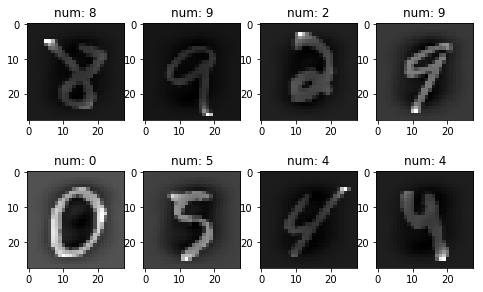

In [105]:
plotExamples(X_test_2, y_test)

## Summary

### Before training models, standardizing data makes learning process more efficient and provides more accurate results.